OBJECTIVE:- For a project based on Olympics data analysis, the primary focus will be on exploring
and understanding the dataset, performing exploratory data analysis (EDA), and
uncovering trends and insights related to athletes, countries, and sports over the
years.


The primary goal is to:

1. Analyze the dataset to understand trends in medal distribution.
2. Identify the top-performing countries and athletes.
3. Study the gender distribution of events and medals.
4. Visualize the data using Python.

In [72]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#loading the dataset
df = pd.read_csv('olympic-data.csv', encoding='latin1')
#displaying the first 5 rows of the dataset
df.head()
#removing unnecessary columns
df = df.drop(columns=['Event_gender'])
df = df.drop(columns=['Country_Code'])
df.head()


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


In [74]:
#checking the structure and basic information of the dataset
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        15316 non-null  object 
 1   Year        15316 non-null  float64
 2   Sport       15316 non-null  object 
 3   Discipline  15316 non-null  object 
 4   Event       15316 non-null  object 
 5   Athlete     15316 non-null  object 
 6   Gender      15316 non-null  object 
 7   Country     15316 non-null  object 
 8   Medal       15316 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [75]:
#checking for missing values in the dataset
df.isnull().sum()


City          117
Year          117
Sport         117
Discipline    117
Event         117
Athlete       117
Gender        117
Country       117
Medal         117
dtype: int64

In [76]:
#checking for duplicate rows in the dataset
df.duplicated().sum()
#displaying the unique values in the 'Medal' column
df['Medal'].unique()

array(['Silver', 'Bronze', 'Gold', nan], dtype=object)

In [77]:
#which city hosted the most Olympic Games?
df['City'].value_counts().head(1)
#which country has won the most medals in the Olympics?
df['Country'].value_counts().head(1)


Country
United States    1992
Name: count, dtype: int64

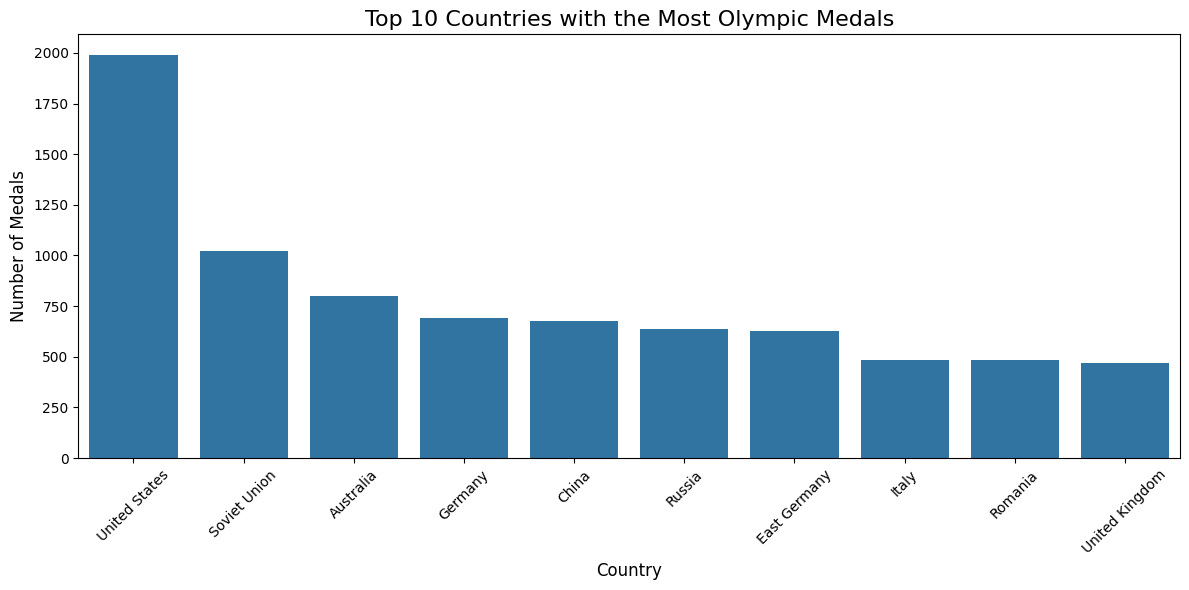

In [78]:
# Visualize the top 10 countries that have won the most Olympic medals

plt.figure(figsize=(12, 6))  # Set the size of the plot for better visibility

# Create a bar plot showing the number of medals for the top 10 countries
sns.countplot(
    data=df,
    x='Country',
    order=df['Country'].value_counts().index[:10],

)

plt.title('Top 10 Countries with the Most Olympic Medals', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=45)  # Rotate country names for easier reading
plt.tight_layout()       # Adjust layout to prevent label overlap
plt.show()


united states has won the most medals in the olympics

In [79]:
#most popular sports in the Olympics
df['Sport'].value_counts().head(5)

Sport
Aquatics      2210
Athletics     1523
Rowing        1377
Hockey         817
Gymnastics     783
Name: count, dtype: int64

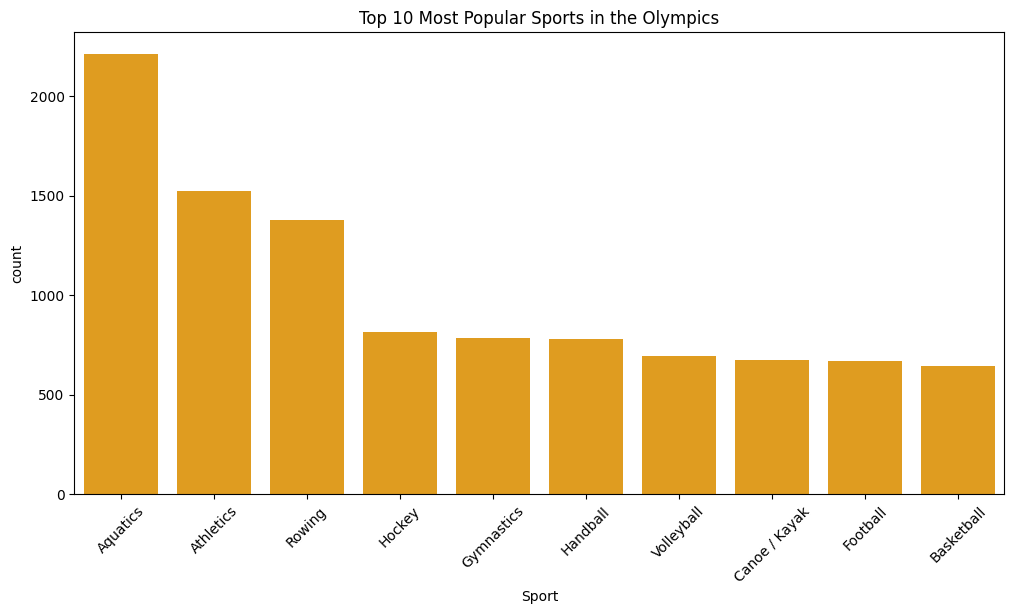

In [80]:
#plot for most popular sports in the Olympics
plt.figure(figsize=(12, 6))     
sns.countplot(data=df, x='Sport', order=df['Sport'].value_counts().index[:10], color='orange')
plt.title('Top 10 Most Popular Sports in the Olympics') 
plt.xticks(rotation=45)
plt.show()  


Aquatics is the most popular sports in olympics.

In [81]:
#which countryhosted the most Olympic Games?
df['City'].value_counts().head(5)

City
Beijing      2042
Sydney       2015
Athens       1998
Atlanta      1859
Barcelona    1705
Name: count, dtype: int64

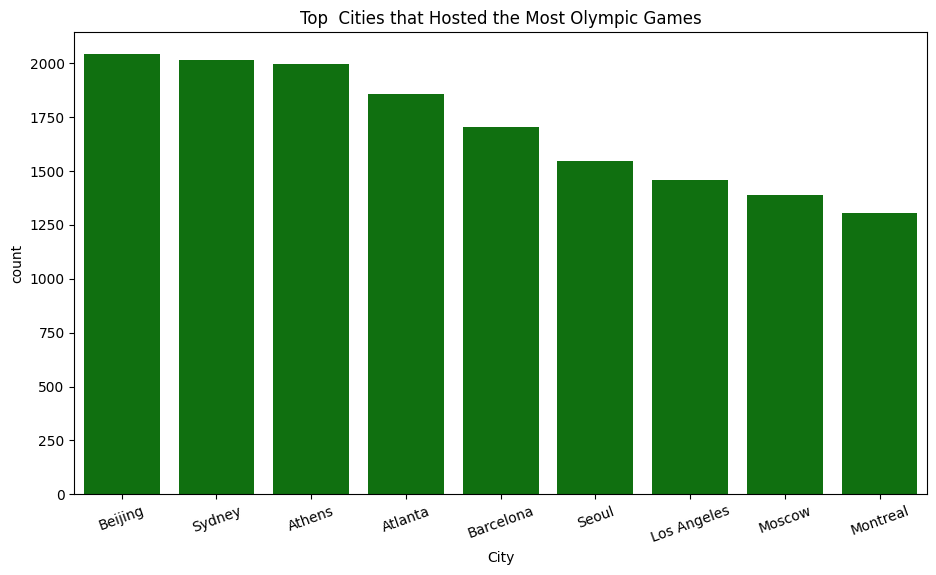

In [82]:
#which country hosted the most Olympic Games?
plt.figure(figsize=(11, 6))
sns.countplot(data=df, x='City', order=df['City'].value_counts().index  [:10], color='green')
plt.title('Top  Cities that Hosted the Most Olympic Games')                       
plt.xticks(rotation=20)
plt.show()  
    

Beijing hosted the most olympic games


In [83]:
#which athlete has won the most medals in the Olympics?
df['Athlete'].value_counts().head(5)    


Athlete
PHELPS, Michael       16
NEMOV, Alexei         12
FISCHER, Birgit       12
TORRES, Dara          12
ANDRIANOV, Nikolay    12
Name: count, dtype: int64

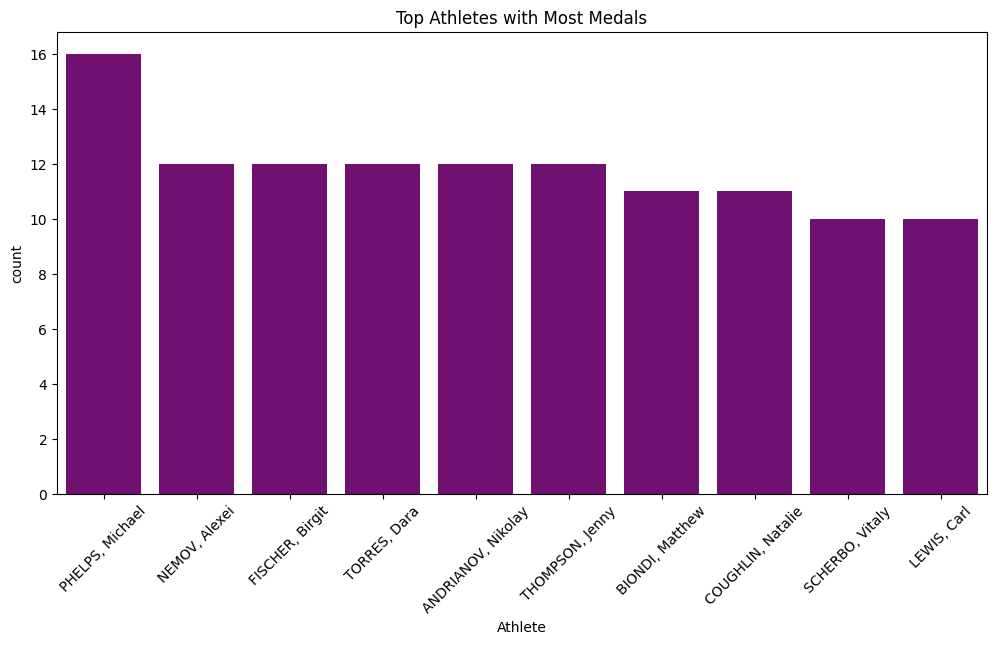

In [84]:
#plot of athletes with the most medals
plt.figure(figsize=(12, 6))     
sns.countplot(data=df, x='Athlete', order=df['Athlete'].value_counts().index[:10], color='purple')
plt.title('Top Athletes with Most Medals')
plt.xticks(rotation=45) 
plt.show()

In [85]:
#most winned medal in the Olympics
df['Medal'].value_counts().head(5)

Medal
Bronze    5258
Gold      5042
Silver    5016
Name: count, dtype: int64

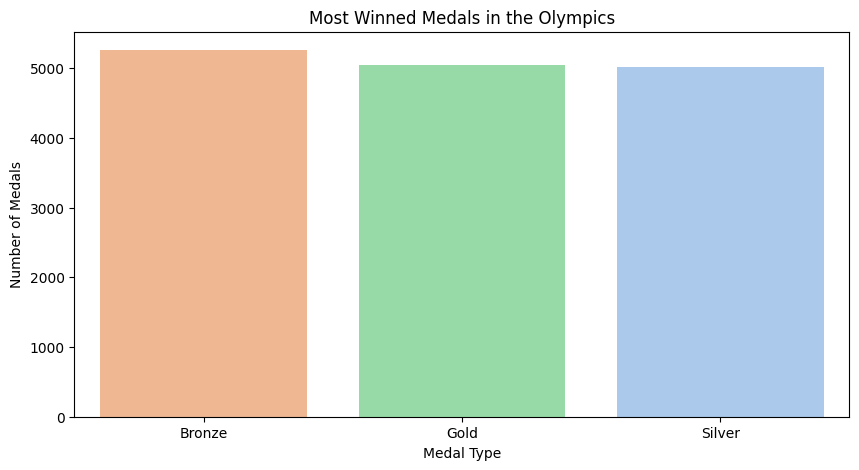

In [86]:
#plot for most winned medal in the Olympics with number of medals
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='Medal',
    hue='Medal',
    order=df['Medal'].value_counts().index,
    palette='pastel',
    legend=False
)
plt.title('Most Winned Medals in the Olympics')
plt.xlabel('Medal Type')
plt.ylabel('Number of Medals')
plt.show()

In [87]:
# gold medals from each country
gold_medals = df[df['Medal'] == 'Gold'].groupby('Country').size()
gold_medals = gold_medals.sort_values(ascending=False).head(10)
df_gold = pd.DataFrame(gold_medals).reset_index()
df_gold.columns = ['Country', 'Gold Medals']
df_gold.head()


,Country,Gold Medals
0,United States,928
1,Soviet Union,439
2,East Germany,286
3,Germany,237
4,China,234


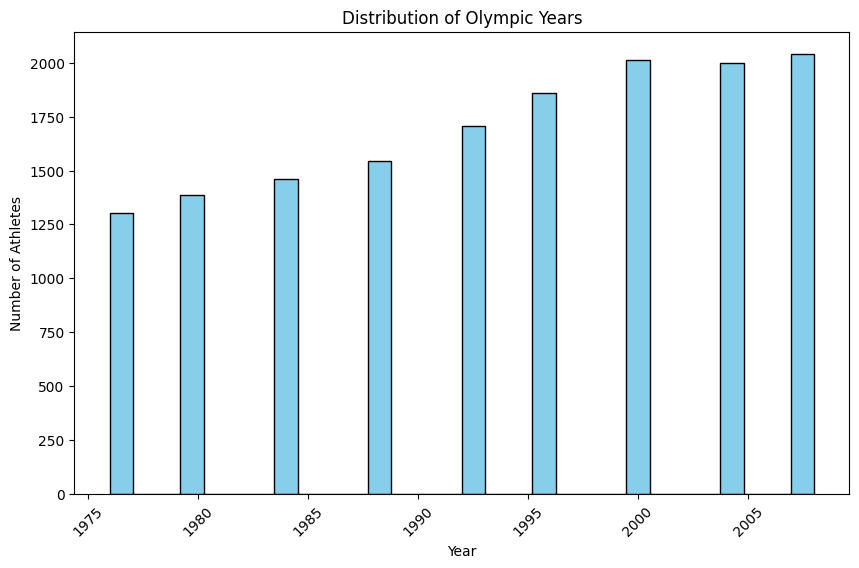

In [88]:

# Distribution of Olympic Years

plt.figure(figsize=(10, 6))
plt.title('Distribution of Olympic Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.hist(df['Year'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.show()

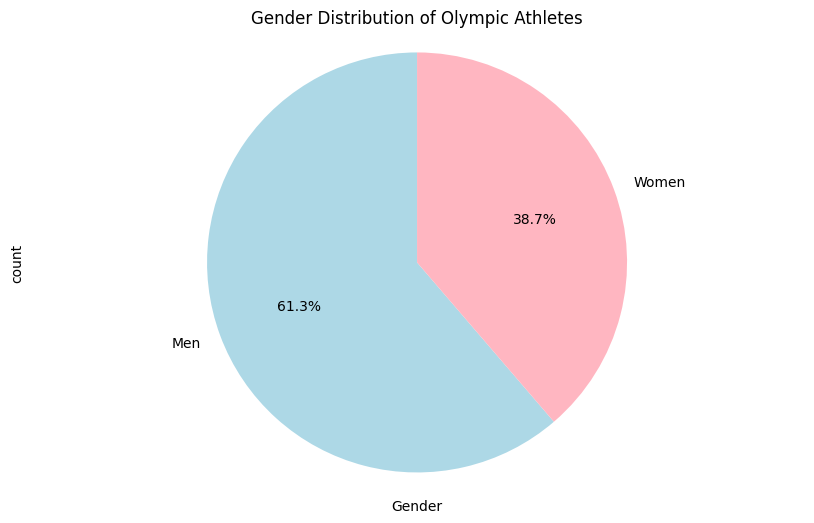

In [89]:
# pie plot Gender Distribution
plt.figure(figsize=(10, 6))
plt.title('Gender Distribution of Olympic Athletes')
plt.xlabel('Gender')
plt.ylabel('Number of Athletes')
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

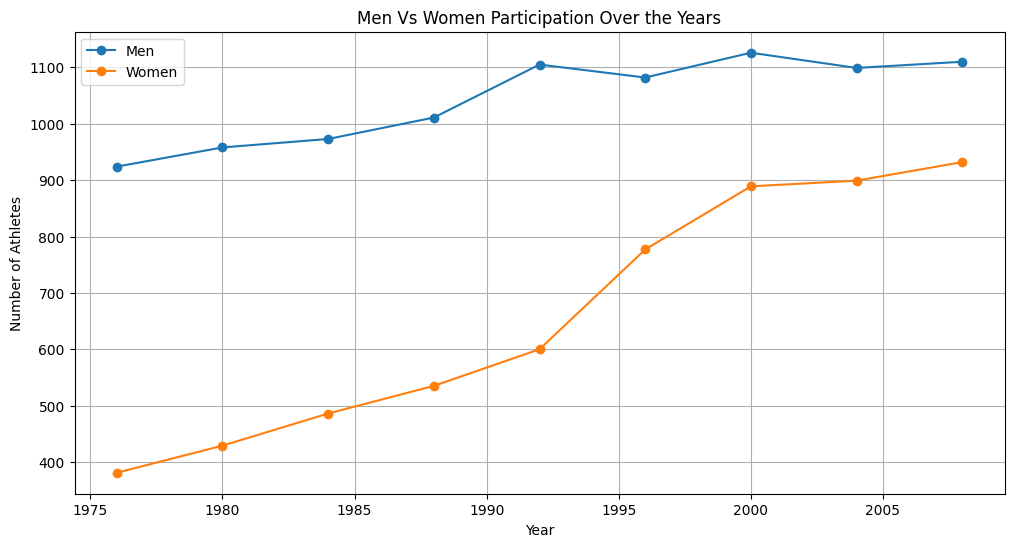

In [90]:
   # Men vs Women Participation Over the Years
   
   # Prepare the data
   men = df[df['Gender'] == 'Men'].groupby('Year').size()
   women = df[df['Gender'] == 'Women'].groupby('Year').size()
   years = sorted(df['Year'].dropna().unique())
   
   plt.figure(figsize=(12, 6))
   plt.plot(years, [men.get(year, 0) for year in years], label='Men', marker='o')
   plt.plot(years, [women.get(year, 0) for year in years], label='Women', marker='o')
   plt.title("Men Vs Women Participation Over the Years")
   plt.xlabel("Year")
   plt.ylabel("Number of Athletes")
   plt.legend()
   plt.grid(True)
   plt.show()

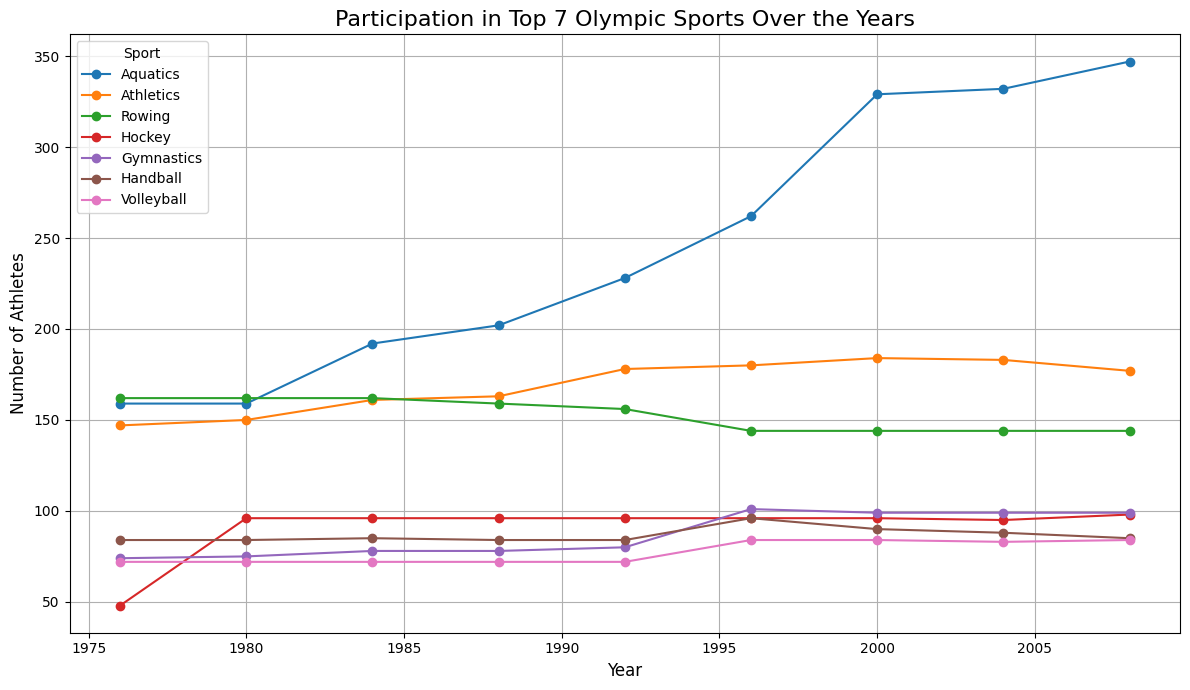

In [95]:
# Visualize participation trends for the top 7 sports in the Olympics over the years

plt.figure(figsize=(12, 7))  # Make the plot large for better visibility

# Identify the top 7 sports with the most total participation
top_sports = df['Sport'].value_counts().index[:7]

# Plot the number of athletes participating in each top sport over the years
for sport in top_sports:
    # Count the number of athletes per year for this sport
    sport_year_counts = df[df['Sport'] == sport].groupby('Year').size()
    plt.plot(
        sport_year_counts.index,      # Years on the x-axis
        sport_year_counts.values,     # Number of athletes on the y-axis
        marker='o',                   # Show points for each year
        label=sport                   # Label for the legend
    )

plt.title("Participation in Top 7 Olympic Sports Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Athletes", fontsize=12)
plt.legend(title='Sport')
plt.grid(True)
plt.tight_layout()
plt.show()

##Summary

In order to find patterns and insights about athletes, nations, and sports over time, we investigated and examined Olympic data for this project.  We looked at gender participation, highlighted the most popular sports and host cities, and identified top-performing nations and athletes through data cleaning, visualization, and statistical analysis.  In addition to providing insightful information about the history and development of the Olympic Games, the visualizations made it easy to comprehend medal distributions and participation trends.